#**Hand written digit detection**

Imports

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing dataset

In [40]:
data = keras.datasets.mnist

In [41]:
(X_train,y_train),(X_test,y_test) = data.load_data()

In [42]:
X_train.shape

(60000, 28, 28)

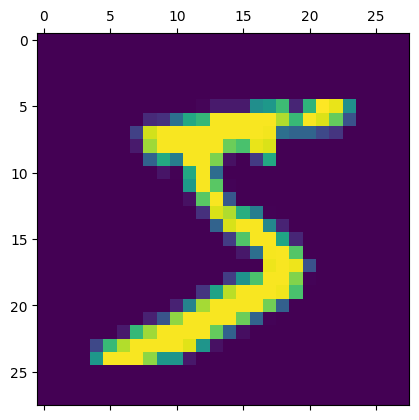

In [43]:
plt.matshow(X_train[0])

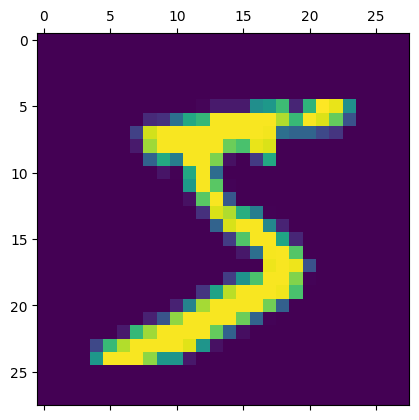

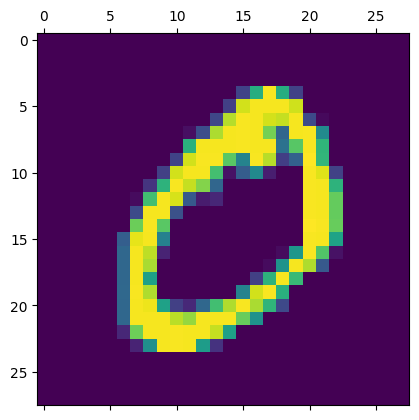

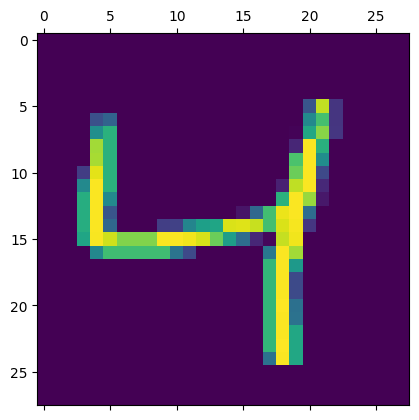

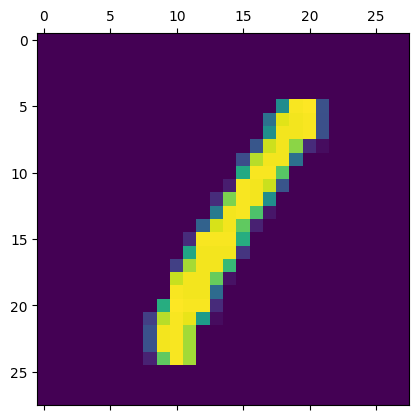

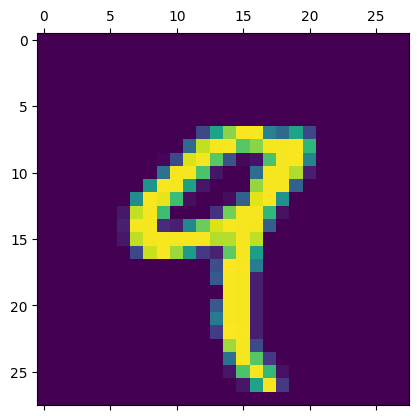

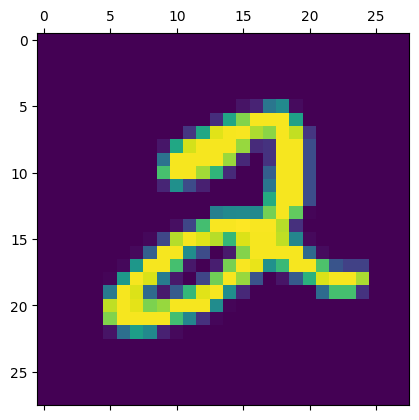

In [44]:
for i in range(6):
  plt.matshow(X_train[i])

In [45]:
X_test.shape

(10000, 28, 28)

In [46]:
y_train.shape

(60000,)

In [47]:
y_test.shape

(10000,)

In [48]:
y_train[:5] # the above image

array([5, 0, 4, 1, 9], dtype=uint8)

flattening the X_train and X_test

In [49]:
new_X_train = X_train/255

new_X_test = X_test/255

In [50]:
flat_X_train = new_X_train.reshape(len(new_X_train),28*28)
flat_X_test = new_X_test.reshape(len(new_X_test),28*28)

In [38]:
flat_X_train.shape

(60000, 784)

In [51]:
flat_X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Keras sequential units

In [52]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),
                       activation = 'sigmoid')
])

model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)


model.fit(flat_X_train,y_train,epochs= 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8134 - loss: 0.7218
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9147 - loss: 0.3057
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9195 - loss: 0.2839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9239 - loss: 0.2749
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9259 - loss: 0.2647


In [54]:
model.evaluate(flat_X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9154 - loss: 0.3026


[0.2692604064941406, 0.9257000088691711]

In [55]:
y_pred = model.predict(flat_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [56]:
y_pred[0]

array([3.3334359e-03, 1.3317234e-08, 9.1999592e-03, 9.6433949e-01,
       1.2361282e-03, 1.6694973e-01, 2.0790525e-08, 9.9979806e-01,
       6.6750392e-02, 6.3393050e-01], dtype=float32)

In [57]:
np.argmax(y_pred[0])

7

In [58]:
y_pred_label = [np.argmax(i) for i  in y_pred]

In [59]:
#y_pred_label

In [60]:
#confusion matix

cm = tf.math.confusion_matrix(labels = y_test ,predictions = y_pred_label)

Text(95.72222222222221, 0.5, 'pred')

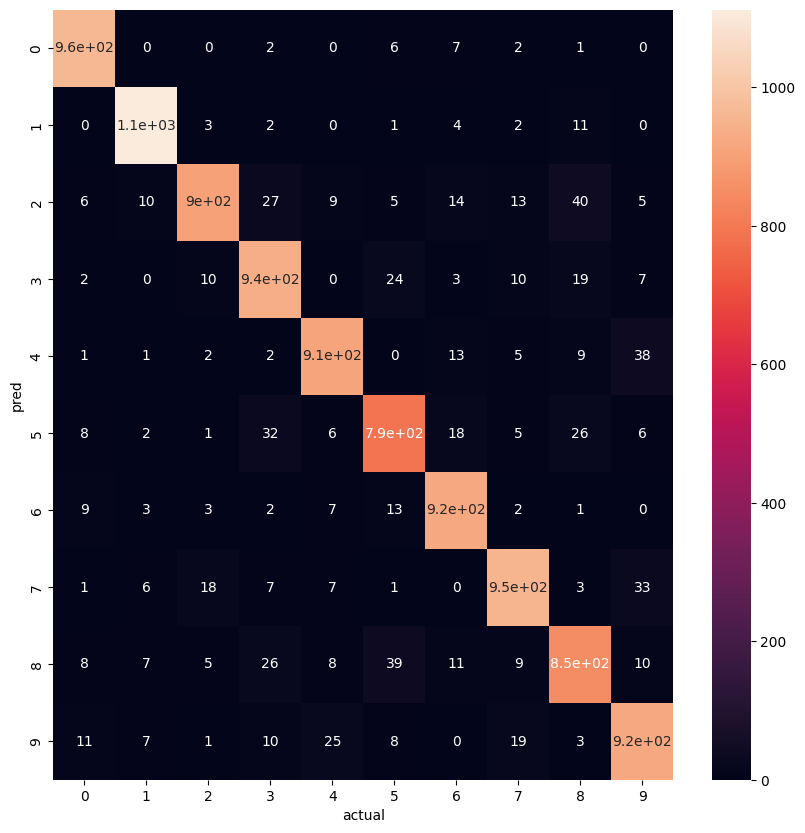

In [62]:
plt.figure(figsize =(10,10))
sns.heatmap(cm,annot =True)
plt.xlabel("actual")
plt.ylabel("pred")

#we can improve accuracy by increasing hidden layer

In [65]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(100, activation='sigmoid') #change 100 - 10 or vice versa
])


model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)


model.fit(flat_X_train,y_train,epochs= 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4127 - loss: 2.4694
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8540 - loss: 0.8610
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8899 - loss: 0.5025
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8961 - loss: 0.4150
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9013 - loss: 0.3651
